In [ ]:
from random import randint

import cv2
import os

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [3]:
train_dir = r'C:\Users\marcb\Desktop\ESIB\2eme anne\sem2\ML\projects\Iteration2\Train'
test_dir = r'C:\Users\marcb\Desktop\ESIB\2eme anne\sem2\ML\projects\Iteration2\Test'

In [4]:
train_image_generator = ImageDataGenerator(rescale=1./255)

test_image_generator = ImageDataGenerator(rescale=1./255)

In [5]:
batch_size = 128

In [6]:
train_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size,
                                                           directory=train_dir,
                                                           shuffle=True,
                                                           target_size=(32, 32))

Found 77141 images belonging to 7 classes.


In [7]:
height = 32
width = 32

In [8]:

train_images = tf.keras.preprocessing.image_dataset_from_directory(
    train_dir,
    image_size=(height, width),  # Size to which images are resized
    batch_size=batch_size)

test_images = tf.keras.preprocessing.image_dataset_from_directory(
    test_dir,
    image_size=(height, width),
    batch_size=batch_size)


Found 77141 files belonging to 7 classes.
Found 19288 files belonging to 7 classes.


In [9]:
test_data_gen = test_image_generator.flow_from_directory(batch_size=batch_size,
                                                         directory=test_dir,
                                                         shuffle=True,
                                                         target_size=(32, 32))

Found 19288 images belonging to 7 classes.


In [10]:
sample_batch = next(train_data_gen)

sample_batch[0].shape

(128, 32, 32, 3)

In [11]:
out_shape = 7 # number of classes

In [13]:
conv_model = tf.keras.models.Sequential([

    layers.Conv2D(16, (3, 3), padding='same', activation='relu', 
                  input_shape=sample_batch[0].shape[1:]),
    layers.Conv2D(32, (3, 3), padding='same', activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    
    layers.Conv2D(64, (3, 3), padding='same', activation='relu'),
    layers.Conv2D(128, (3, 3), padding='same', activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    
    layers.Flatten(),
    
    layers.Dense(512, activation='relu'),
    layers.Dense(256, activation='relu'),
    layers.Dense(out_shape, activation='softmax')

])

In [14]:
conv_model.compile(optimizer='adam',
                   loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
                   metrics=['accuracy','recall','precision'])

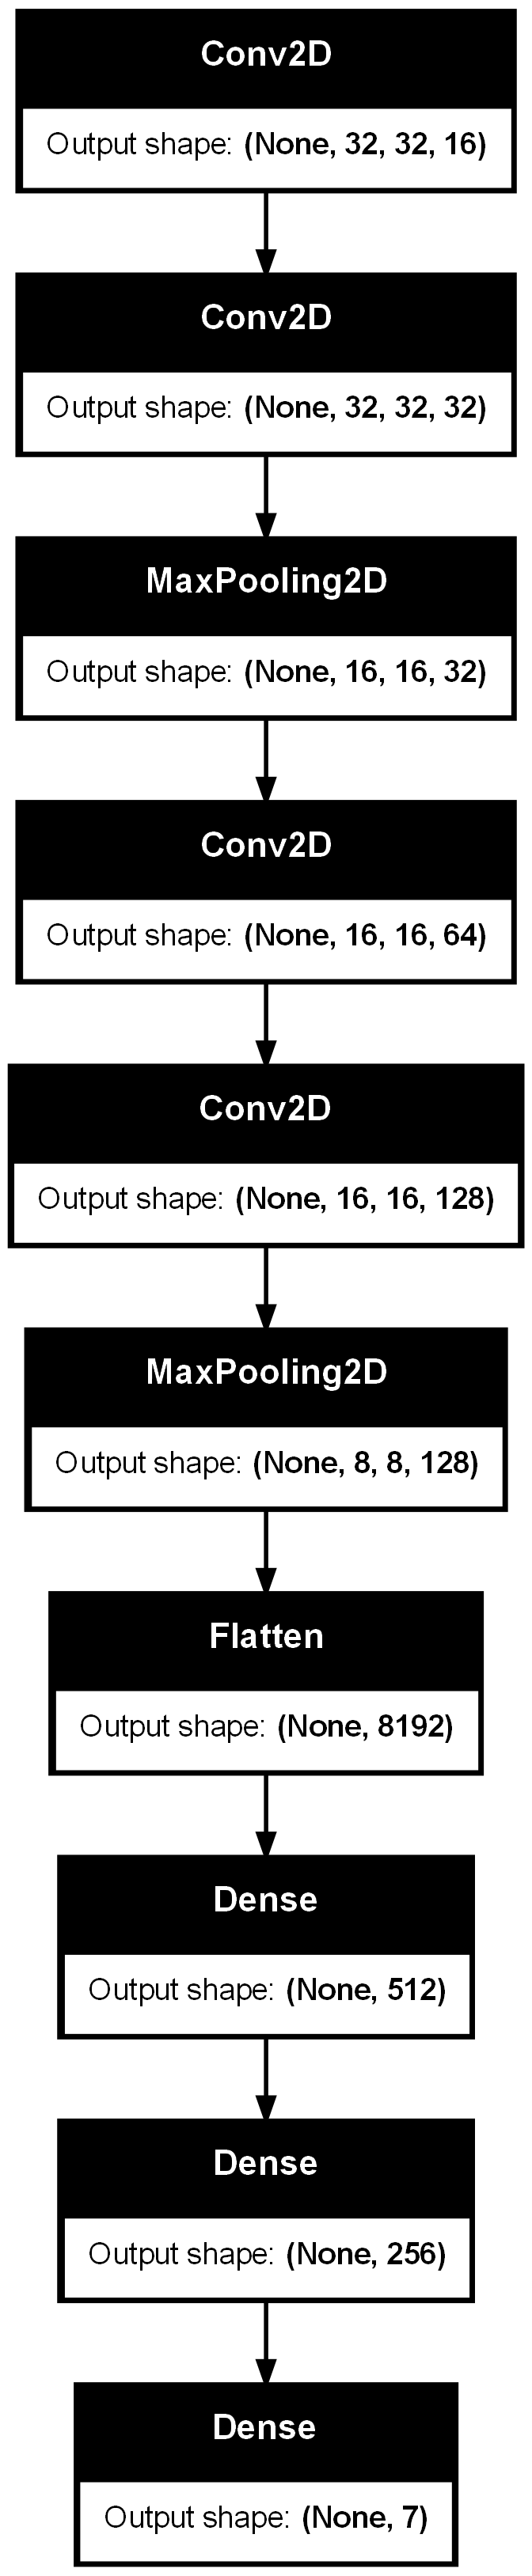

In [15]:
keras.utils.plot_model(conv_model, 'model_image_classification_shapes.png', show_shapes=True)

In [ ]:
training_hist = conv_model.fit(train_data_gen,
                               epochs=5,
                               steps_per_epoch=len(train_images) // batch_size,
                               validation_data=test_data_gen,
                               validation_steps=len(test_images) // batch_size)

Epoch 1/5
4/4 ━━━━━━━━━━━━━━━━━━━━ 7s 870ms/step - accuracy: 0.9240 - loss: 0.2951 - precision: 0.9426 - recall: 0.9102 - val_accuracy: 0.9297 - val_loss: 0.3197 - val_precision: 0.9421 - val_recall: 0.8906
Epoch 2/5
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 543ms/step - accuracy: 0.9294 - loss: 0.2587 - precision: 0.9623 - recall: 0.9047 - val_accuracy: 0.9609 - val_loss: 0.1790 - val_precision: 0.9756 - val_recall: 0.9375
Epoch 3/5
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 633ms/step - accuracy: 0.9359 - loss: 0.2080 - precision: 0.9495 - recall: 0.9302 - val_accuracy: 0.9688 - val_loss: 0.0792 - val_precision: 0.9841 - val_recall: 0.9688
Epoch 4/5
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 633ms/step - accuracy: 0.9281 - loss: 0.3029 - precision: 0.9432 - recall: 0.9203 - val_accuracy: 0.9609 - val_loss: 0.2347 - val_precision: 0.9839 - val_recall: 0.9531
Epoch 5/5
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 603ms/step - accuracy: 0.9440 - loss: 0.2175 - precision: 0.9558 - recall: 0.9357 - val_accuracy: 0.9453 - val_loss: 0.1721 - val_prec

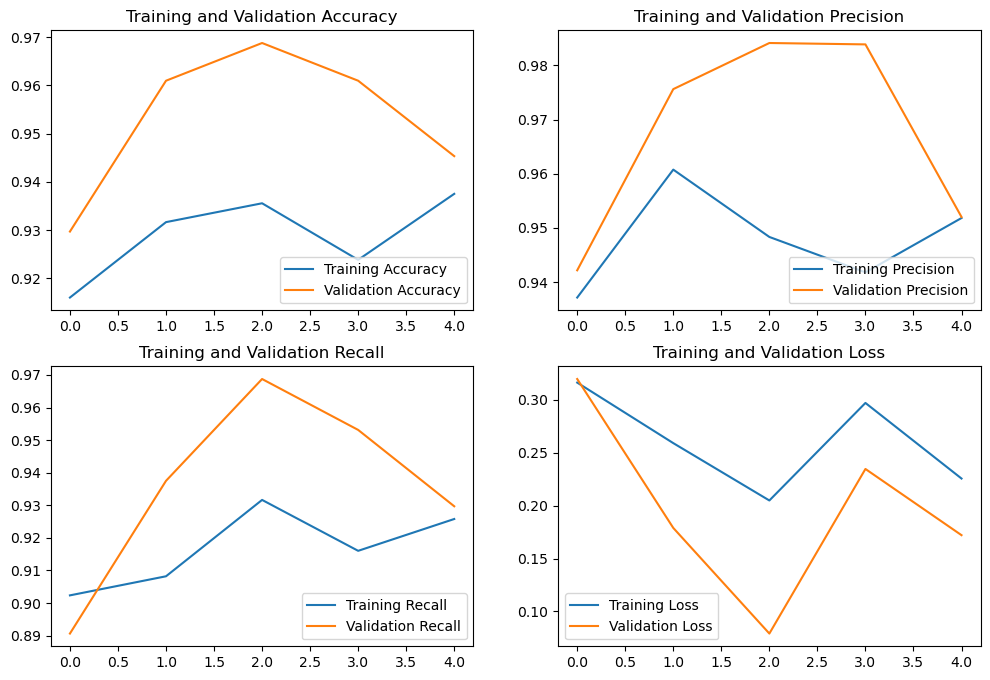

In [18]:
acc = training_hist.history['accuracy']
val_acc = training_hist.history['val_accuracy']

loss = training_hist.history['loss']
val_loss = training_hist.history['val_loss']

rec = training_hist.history['recall']
val_rec = training_hist.history['val_recall']

pre = training_hist.history['precision']
val_pre = training_hist.history['val_precision']

epochs_range = range(5)

plt.figure(figsize=(12, 8))

#accuracy
plt.subplot(2, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')

plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

#precision
plt.subplot(2, 2, 2)

plt.plot(epochs_range, pre, label='Training Precision')
plt.plot(epochs_range, val_pre, label='Validation Precision')

plt.legend(loc='lower right')
plt.title('Training and Validation Precision')

#recall
plt.subplot(2, 2, 3)

plt.plot(epochs_range, rec, label='Training Recall')
plt.plot(epochs_range, val_rec, label='Validation Recall')

plt.legend(loc='lower right')
plt.title('Training and Validation Recall')

#loss
plt.subplot(2, 2, 4)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')

plt.legend(loc='lower left')

plt.title('Training and Validation Loss') 




plt.show()

In [19]:
training_hist2 = conv_model.fit(train_data_gen,
                               epochs=4,
                               steps_per_epoch=len(train_images) // batch_size,
                               validation_data=test_data_gen,
                               validation_steps=len(test_images) // batch_size)

Epoch 1/4
4/4 ━━━━━━━━━━━━━━━━━━━━ 7s 846ms/step - accuracy: 0.9706 - loss: 0.1122 - precision: 0.9804 - recall: 0.9635 - val_accuracy: 0.9453 - val_loss: 0.2079 - val_precision: 0.9597 - val_recall: 0.9297
Epoch 2/4
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 499ms/step - accuracy: 0.9526 - loss: 0.1801 - precision: 0.9599 - recall: 0.9479 - val_accuracy: 0.9531 - val_loss: 0.1839 - val_precision: 0.9597 - val_recall: 0.9297
Epoch 3/4
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 590ms/step - accuracy: 0.9380 - loss: 0.2265 - precision: 0.9403 - recall: 0.9315 - val_accuracy: 0.9219 - val_loss: 0.2015 - val_precision: 0.9435 - val_recall: 0.9141
Epoch 4/4
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 704ms/step - accuracy: 0.9451 - loss: 0.1727 - precision: 0.9488 - recall: 0.9227 - val_accuracy: 0.9297 - val_loss: 0.1945 - val_precision: 0.9365 - val_recall: 0.9219


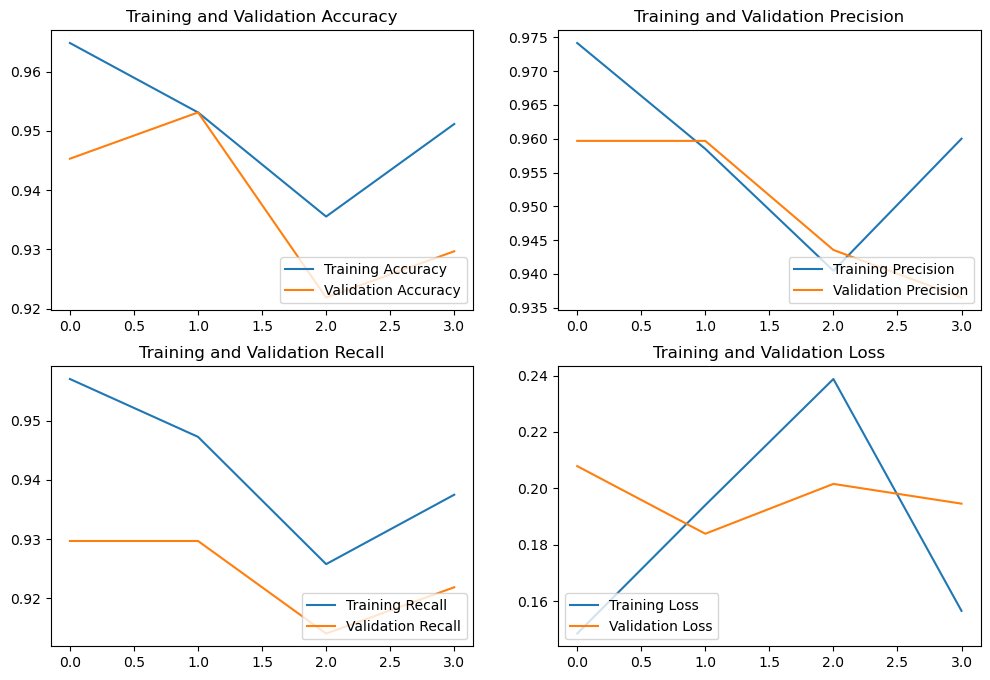

In [20]:
acc = training_hist2.history['accuracy']
val_acc = training_hist2.history['val_accuracy']

loss = training_hist2.history['loss']
val_loss = training_hist2.history['val_loss']

rec = training_hist2.history['recall']
val_rec = training_hist2.history['val_recall']

pre = training_hist2.history['precision']
val_pre = training_hist2.history['val_precision']

epochs_range = range(4)

plt.figure(figsize=(12, 8))

#accuracy
plt.subplot(2, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')

plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

#precision
plt.subplot(2, 2, 2)

plt.plot(epochs_range, pre, label='Training Precision')
plt.plot(epochs_range, val_pre, label='Validation Precision')

plt.legend(loc='lower right')
plt.title('Training and Validation Precision')

#recall
plt.subplot(2, 2, 3)

plt.plot(epochs_range, rec, label='Training Recall')
plt.plot(epochs_range, val_rec, label='Validation Recall')

plt.legend(loc='lower right')
plt.title('Training and Validation Recall')

#loss
plt.subplot(2, 2, 4)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')

plt.legend(loc='lower left')

plt.title('Training and Validation Loss') 




plt.show()

Building an auto-encoder 

In [22]:
stacked_encoder = tf.keras.models.Sequential([
    
    layers.Flatten(input_shape=[32, 32, 3]),

    layers.Dense(64, activation="relu"),
    layers.Dense(32, activation="relu"),
    
    layers.Dense(16, activation="relu")
])

In [23]:
stacked_encoder.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_3 (Flatten)                  │ (None, 3072)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 64)                  │         196,672 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 16)                  │             528 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 199,280 (778.44 KB)

 Trainable params: 199,280 (778.44 KB)

 Non-trainable params: 0 (0.00 B)

In [25]:
stacked_decoder = tf.keras.models.Sequential([
    
    layers.Dense(32, activation="relu", input_shape=[16]),

    layers.Dense(64, activation="relu"),
    
    layers.Dense(32 * 32 * 3, activation="relu"),
                                           
    layers.Reshape([32, 32, 3])
])

In [26]:
stacked_decoder.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_15 (Dense)                     │ (None, 32)                  │             544 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 64)                  │           2,112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 3072)                │         199,680 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ reshape_1 (Reshape)                  │ (None, 32, 32, 3)           │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 202,336 (790.38 KB)

 Trainable params: 202,336 (790.38 KB)

 Non-trainable params: 0 (0.00 B)

In [27]:
ae_model = tf.keras.models.Sequential([stacked_encoder, stacked_decoder])

ae_model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ sequential_3 (Sequential)            │ ?                           │         199,280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ sequential_5 (Sequential)            │ ?                           │         202,336 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 401,616 (1.53 MB)

 Trainable params: 401,616 (1.53 MB)

 Non-trainable params: 0 (0.00 B)

In [28]:
ae_model.compile(loss='mean_absolute_error',
                 optimizer=tf.keras.optimizers.RMSprop(), 
                 metrics=['mae'])

In [29]:
train_data_gen